In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import random
import os
import json

0.2984
0.2984


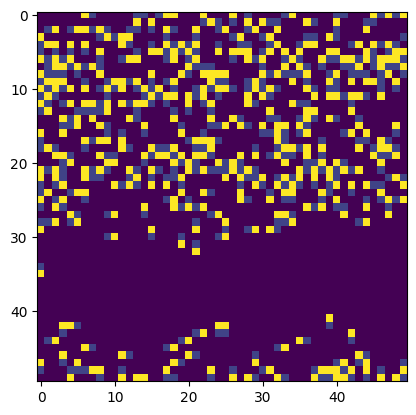

In [8]:


class Simulation:
    def __init__(self,  b_size=100, density=0.5, chain_len=5):

        self.b_size = b_size
        self.board = np.zeros((b_size, b_size))
        self.chain_len = chain_len
        self.density = density
        self.n_chains = int(b_size**2 * density / chain_len)
        self.positions = []
        self.mobility = []

        idx = 0
        while idx < self.n_chains:
            row = len(self.positions)//self.b_size
            for i in range(1,self.b_size, 2):
                random_mov = np.random.choice([0,-1])
                chains_positions = [[1+row*chain_len + k, i + random_mov  ] for k in range(chain_len-1)]
                if chains_positions[:][0] not in self.positions:
                    self.positions.append(chains_positions)
                    idx += 1
                if idx >= self.n_chains:
                    break
        unique_positions = []
        for position in self.positions:
            if position not in unique_positions:
                unique_positions.append(position)

        self.labeled_chains = {key: position for key, position in enumerate(unique_positions, 1)}

        self.update_board()
        self.density = 1 - len(np.where(self.board == 0)[0]) / self.b_size**2
        self.density_1 = len(self.labeled_chains) * (self.chain_len-1) / (self.b_size)**2



    def update_board(self):
        self.board = np.zeros((self.b_size, self.b_size))
        for key, positions in self.labeled_chains.items():
            for index, (x, y) in enumerate(positions):
                if index == 0:
                    # Initialize to a different value if it's the first one in the chain
                    self.board[x, y] = 5 + index
                else:
                    self.board[x, y] = index

    def free_spot_finder(self, coordinate):
        free_spots = []
        x, y = coordinate
        for s in [1, -1]:
            if self.board[(x + s) % self.b_size, y] == 0:
                free_spots.append([(x + s) % self.b_size, y])
            if self.board[x, (y + s) % self.b_size] == 0:
                free_spots.append([x, (y + s) % self.b_size])
        return free_spots

    def mobility_measurer(self):
        count = 0
        for positions in self.labeled_chains.values():
            x,y = positions[0]
            if len(self.free_spot_finder([x,y])) > 0:
                count += 1
        return count/len(self.labeled_chains)

    def step(self):
      for key, positions in self.labeled_chains.items():
        free_spots = self.free_spot_finder(positions[0])
        if free_spots:
          mov = random.choice(free_spots)
          self.board[positions[-1]] = 0
          positions[1:] = positions[0:-1]
          positions[0] = mov
        self.update_board()
      self.mobility.append(self.mobility_measurer())

    def evolution(self, num_of_iterations, show_progress_bar=False):
        if show_progress_bar:
            progress_bar = tqdm(range(num_of_iterations))
        else:
            progress_bar = range(num_of_iterations)

        for i in progress_bar:
            self.step()
            #if i%2 == 0:
            #  plt.imshow(self.board)
            #  plt.show()
            #  print(s.mobility[-1])


s = Simulation(b_size=50, density= 0.6, chain_len=3)
print(s.density)
print(s.density_1)
s.evolution(10)
plt.imshow(s.board)


In [11]:
# Import necessary libraries
from tqdm import tqdm

# Define parameters
board_size = 50
num_iteration = 100
density_vals = [0.4, 0.6, 0.8, 0.9]  # Modified density values
print(density_vals)
chain_l_vals = [2,3]  # Modified chain lengths
results = {}

# Iterate over chain lengths and density values
for chain_len in chain_l_vals:
    results[chain_len] = {}  # Initialize dictionary for current chain length
    for density in tqdm(density_vals, desc=f"Iterating over densities for chain_len {chain_len -1}"):
        s = Simulation(b_size=board_size, density=density, chain_len=chain_len)
        print(s.density)
        s.evolution(num_iteration)        
        results[chain_len][s.density] = s.mobility[-1]



[0.4, 0.6, 0.8, 0.9]


Iterating over densities for chain_len 1:   0%|          | 0/4 [00:00<?, ?it/s]

0.15200000000000002


{10: {0.2844: [1.0, 1.0, 0.9873417721518988, 0.9493670886075949, 0.8860759493670886, 0.7848101265822784, 0.7341772151898734, 0.6962025316455697, 0.6962025316455697, 0.7088607594936709, 0.6835443037974683, 0.6582278481012658, 0.6962025316455697, 0.6962025316455697, 0.6835443037974683, 0.6962025316455697, 0.7341772151898734, 0.7341772151898734, 0.6962025316455697, 0.6835443037974683, 0.6962025316455697, 0.6835443037974683, 0.6582278481012658, 0.759493670886076, 0.7721518987341772, 0.810126582278481, 0.7848101265822784, 0.7848101265822784, 0.7721518987341772, 0.7468354430379747, 0.7341772151898734, 0.7974683544303798, 0.759493670886076, 0.7341772151898734, 0.6962025316455697, 0.7341772151898734, 0.7215189873417721, 0.7215189873417721, 0.6835443037974683, 0.7088607594936709, 0.6962025316455697, 0.7341772151898734, 0.7215189873417721, 0.6708860759493671, 0.6455696202531646, 0.620253164556962, 0.5949367088607594, 0.620253164556962, 0.5949367088607594, 0.620253164556962, 0.6075949367088608, 0

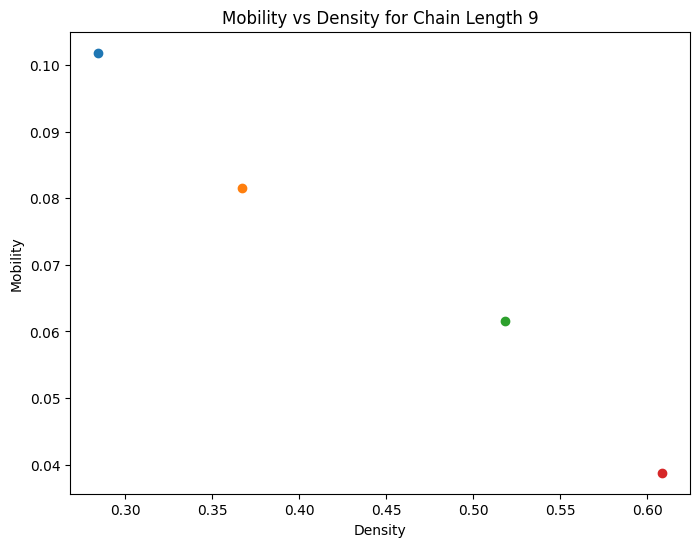

In [9]:
print(results)
# Plot results
for chain_len in chain_l_vals:
    plt.figure(figsize=(8, 6))
    plt.title(f"Mobility vs Density for Chain Length {chain_len - 1}")
    plt.xlabel("Density")
    plt.ylabel("Mobility")
    
    # Plot existing data
    for density, mobility in results[chain_len].items():
        plt.plot(density , np.mean(mobility), marker='o', label=f"Density: {density}")
    

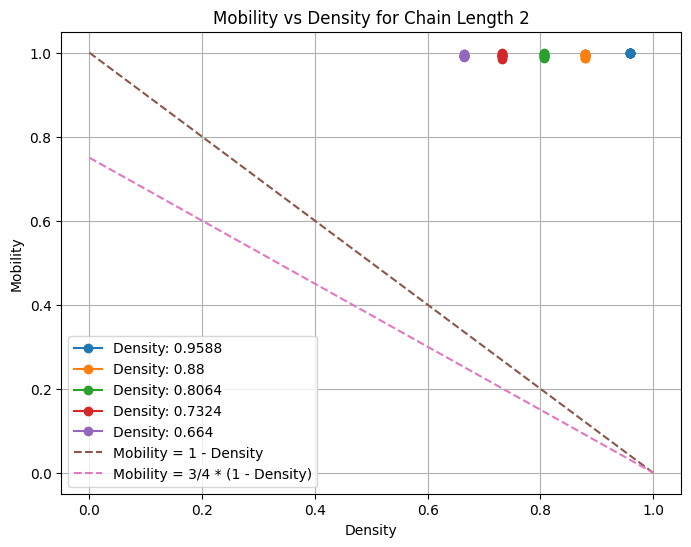

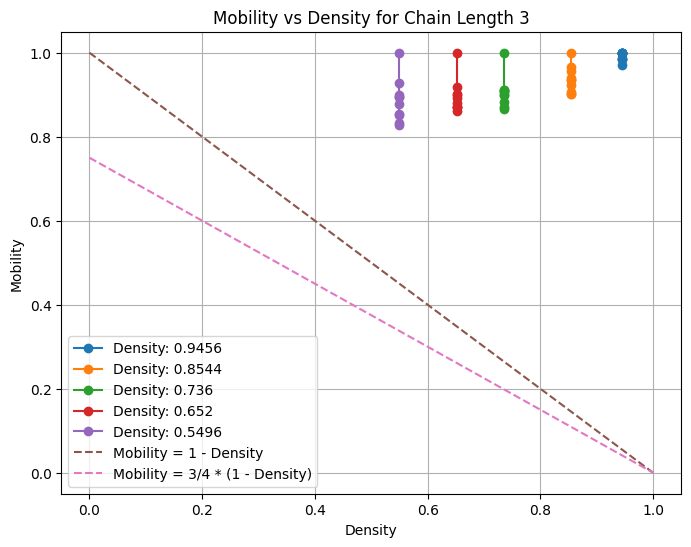

In [89]:
import matplotlib.pyplot as plt
import numpy as np

# Define functions
def mobility_func_1(density):
    return 1 - density

def mobility_func_2(density):
    return 3/4 * (1 - density)

# Plot results
for chain_len in chain_l_vals:
    plt.figure(figsize=(8, 6))
    plt.title(f"Mobility vs Density for Chain Length {chain_len}")
    plt.xlabel("Density")
    plt.ylabel("Mobility")
    
    # Plot existing data
    for density, mobility in results[chain_len].items():
        plt.plot([density] * len(mobility), mobility, marker='o', label=f"Density: {density}")
    
    # Plot additional functions
    density_range = np.linspace(0, 1, 100)
    plt.plot(density_range, mobility_func_1(density_range), label="Mobility = 1 - Density", linestyle='--')
    plt.plot(density_range, mobility_func_2(density_range), label="Mobility = 3/4 * (1 - Density)", linestyle='--')
    
    plt.legend()
    plt.grid(True)
    plt.show()
